# <center>Laboratorium Całki<br>Metody Numeryczne</center>

# Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\sin^2(\cfrac{1}{x-1.01})dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=1$ przy pomocy następujących metod:  
    1. Metoda Prostokątów
    2. Metoda Trapezów - [trapezoid](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid)
    3. Metoda Kwadratur - [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)
    2. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

In [94]:
import numpy as np
from scipy import integrate
from typing import Union
from matplotlib import pyplot as plt

#METODA PROSTOKATOW
def metoda_prostokatow(fun:callable, a, b, dx):
    ilosc_prostokatow = [1/i for i in dx]
    przedzial = [np.linspace(a, b, int(i)+1) for i in ilosc_prostokatow]

    calka_prostokat = np.zeros(len(dx))

    for i in range(len(dx)):
        for j in range(len(przedzial[i])):
            calka_prostokat[i] += fun(przedzial[i][j]) * dx[i]
    return calka_prostokat   

#METODA TRAPEZOW
def metoda_trapezow(fun:callable, a, b, dx):
    ilosc_trapezow = [1/i for i in dx]
    przedzial = [np.linspace(a, b, int(i)+1) for i in ilosc_trapezow]

    y = [fun(i) for i in przedzial]

    wynik = np.zeros(len(y))
    for i in range(len(y)):
        wynik[i] = integrate.trapezoid(y[i], przedzial[i])
    return wynik

#POROWNYWANIE
def porownanie_quad_prost(fun:callable, a, b, dx):
    wynik = metoda_prostokatow(fun, a, b, dx)
    quad = integrate.quad(fun, a, b)

    blad = []
    for i in range(len(dx)):
        blad.append(abs(wynik[i] - quad[0]))

    dx_as_string = []
    for i in range(len(dx)):
        dx_as_string.append(str(dx[i]))

    plt.bar(dx_as_string, blad)
    plt.grid
    plt.title("Roznica wynikow miedzy metoda prostokatow a funkcja quad")
    plt.yscale('log')
    plt.show()

def porownanie_quadrature_prost(fun:callable, a, b, dx):
    wynik = metoda_prostokatow(fun, a, b, dx)
    quadrature = integrate.quadrature(fun, a, b)

    blad = []
    for i in range(len(dx)):
        blad.append(abs(wynik[i] - quadrature[0]))

    dx_as_string = []
    for i in range(len(dx)):
        dx_as_string.append(str(dx[i]))

    plt.bar(dx_as_string, blad)
    plt.grid
    plt.title("Roznica wynikow miedzy metoda prostokatow a funkcja quadrature")
    plt.yscale('log')
    plt.show() 

def porownanie_quad_trapz(fun:callable, a, b, dx):
    wynik = metoda_trapezow(fun, a, b, dx)
    quadrature = integrate.quad(fun, a, b)

    blad = []
    for i in range(len(dx)):
        blad.append(abs(wynik[i] - quadrature[0]))

    dx_as_string = []
    for i in range(len(dx)):
        dx_as_string.append(str(dx[i]))

    plt.bar(dx_as_string, blad)
    plt.grid
    plt.title("Roznica wynikow miedzy metoda trapezow a funkcja quad")
    plt.yscale('log')
    plt.show()  

def porownanie_quadrature_trapz(fun:callable, a, b, dx):
    wynik = metoda_trapezow(fun, a, b, dx)
    quadrature = integrate.quadrature(fun, a, b)

    blad = []
    for i in range(len(dx)):
        blad.append(abs(wynik[i] - quadrature[0]))

    dx_as_string = []
    for i in range(len(dx)):
        dx_as_string.append(str(dx[i]))

    plt.bar(dx_as_string, blad)
    plt.grid
    plt.title("Roznica wynikow miedzy metoda trapezow a funkcja quadrature")
    plt.yscale('log')
    plt.show()     

def porownanie_quad_quadrature(fun:callable, a, b):
    quad = integrate.quad(fun, a, b)
    quadrature = integrate.quadrature(fun, a ,b)
    blad = abs(quad[0] - quadrature[0])
    print("Roznica wynikow miedzy metoda kwadratur, a funkcja quad wynosi:", blad)
#------------------------------------------------#


(0.6755141541635237, 7.3664441581185955e-09)


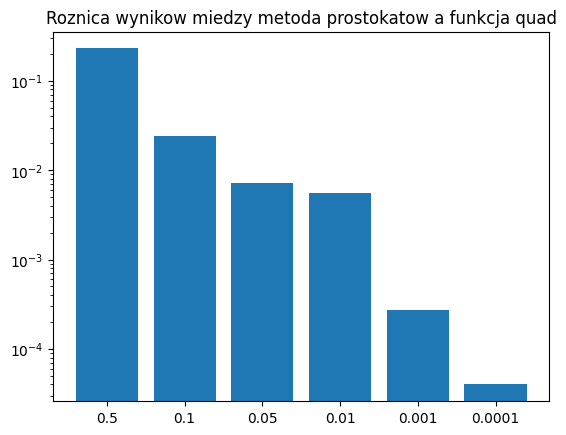

c:\Users\revte\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\_quadrature.py:276: AccuracyWarning: maxiter (50) exceeded. Latest difference = 9.037836e-03
  warnings.warn(


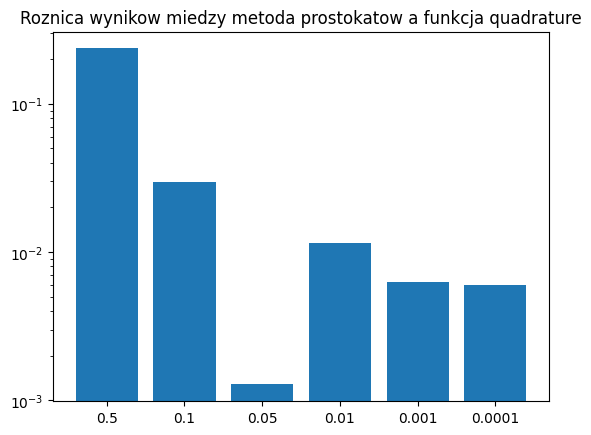

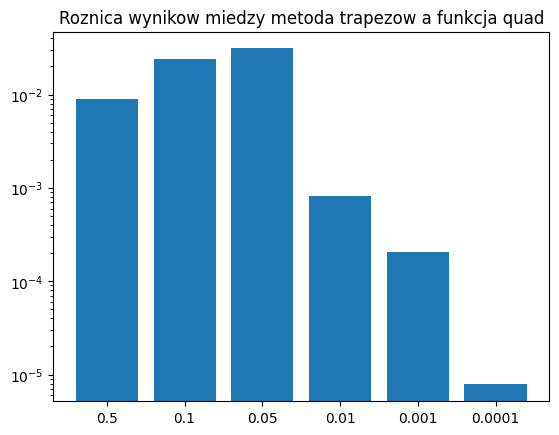

c:\Users\revte\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\_quadrature.py:276: AccuracyWarning: maxiter (50) exceeded. Latest difference = 9.037836e-03
  warnings.warn(


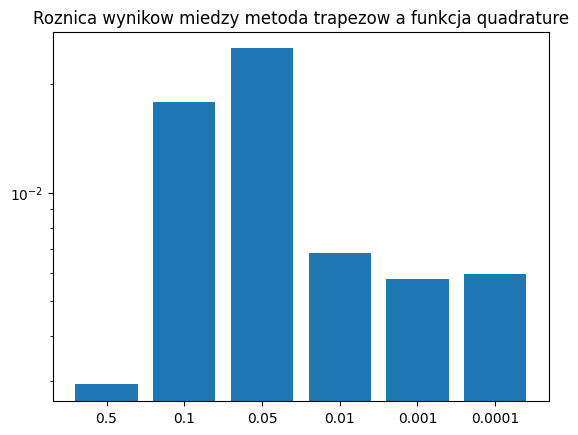

Roznica wynikow miedzy metoda kwadratur, a funkcja quad wynosi: 0.005980858689556334


c:\Users\revte\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\_quadrature.py:276: AccuracyWarning: maxiter (50) exceeded. Latest difference = 9.037836e-03
  warnings.warn(


In [95]:

def f1(x):
    return np.sin(1/(x- 1.01))**2

dx = [0.5, 0.1, 0.05, 0.01, 0.001, 0.0001]
a = 0
b = 1

print(integrate.quad(f1, a, b))

porownanie_quad_prost(f1, a, b, dx)

porownanie_quadrature_prost(f1, a, b, dx)

porownanie_quad_trapz(f1, a, b, dx)

porownanie_quadrature_trapz(f1, a, b, dx)

porownanie_quad_quadrature(f1, a, b)

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{-x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

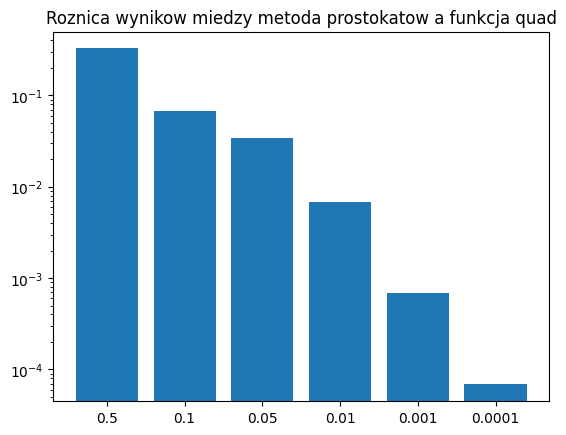

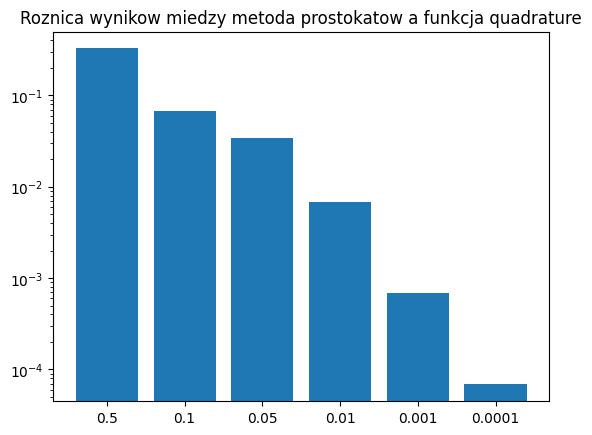

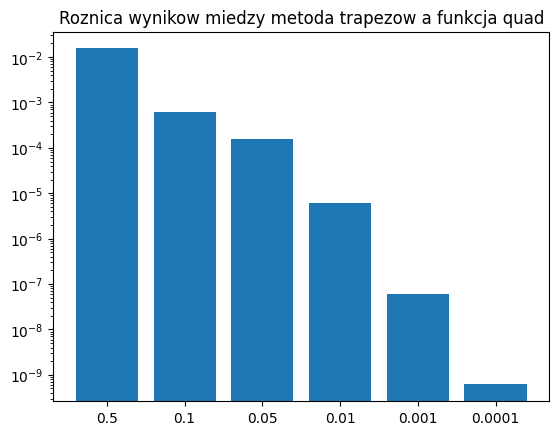

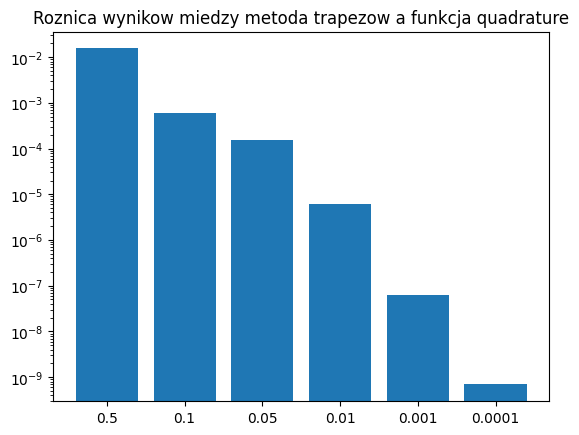

Roznica wynikow miedzy metoda kwadratur, a funkcja quad wynosi: 7.772815724393922e-11


In [96]:
def f2(x):
    return np.e **(-x**2)

porownanie_quad_prost(f2, a, b, dx)

porownanie_quadrature_prost(f2, a, b, dx)

porownanie_quad_trapz(f2, a, b, dx)

porownanie_quadrature_trapz(f2, a, b, dx)

porownanie_quad_quadrature(f2, a, b)


***Zadanie 3.***  
Dla funkcji 

$$f(x) = x^{x}$$

wyznacz numerycznie wartośc całki na przedziale $a = 1$, $b=2$  w  taki sam sposób jak w zadaniu 1.

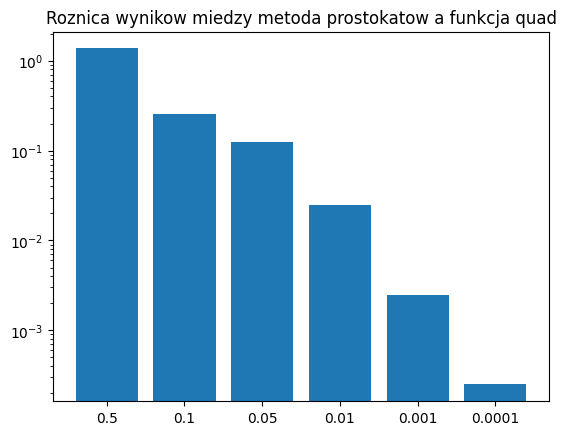

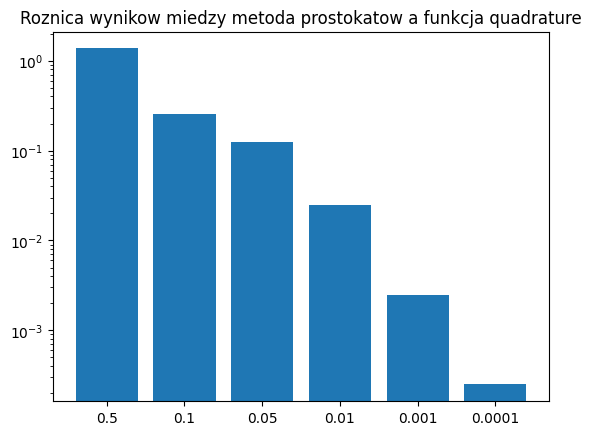

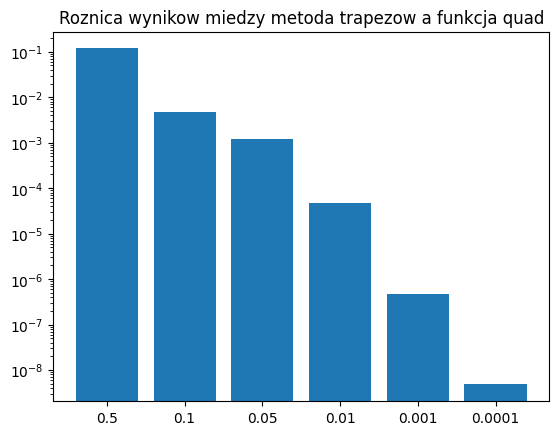

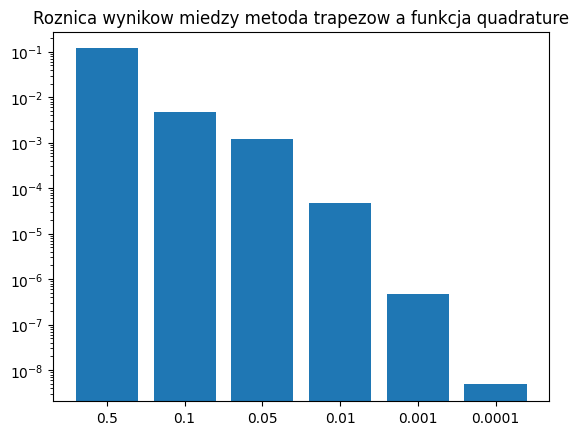

Roznica wynikow miedzy metoda kwadratur, a funkcja quad wynosi: 1.7787549211334408e-11


In [97]:
def f3(x):
    return x ** x

a = 1
b = 2

porownanie_quad_prost(f3, a, b, dx)

porownanie_quadrature_prost(f3, a, b, dx)

porownanie_quad_trapz(f3, a, b, dx)

porownanie_quadrature_trapz(f3, a, b, dx)

porownanie_quad_quadrature(f3, a, b)

Wnioski

Jak widac, poszczegolne metody sa bardziej lub mniej dokladne w zaleznosci od funkcji, ktorej analiza jest dokonywana. Funkcja im bardziej pofalowana, tym bardziej wynik z metody prostokatow bedzie niezgodny z rzeczywistoscia. Warto takze zauwazyc ze glownym czynnikiem wynzaczajacym jakosc obliczen jest wielkosc kroku dx. Przy mniejszych wartosciach blad robi sie pomijalny. Ostatecznie metoda trapezow byla bardziej dokladna od metody prostokatow ze wzgledow oczywistych - jest lepiej przystosowana do bardziej precyzyjnych obliczen. 